In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Top 100 Healthiest Food in the World.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Food                        98 non-null     object 
 1   Nutrition Value (per 100g)  98 non-null     object 
 2   Quantity                    98 non-null     object 
 3   Originated From             98 non-null     object 
 4   Calories                    98 non-null     int64  
 5   Protein (g)                 98 non-null     float64
 6   Fiber (g)                   98 non-null     float64
 7   Vitamin C (mg)              98 non-null     float64
 8   Antioxidant Score           98 non-null     int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 7.0+ KB


In [4]:
df.isna().sum()

Food                          0
Nutrition Value (per 100g)    0
Quantity                      0
Originated From               0
Calories                      0
Protein (g)                   0
Fiber (g)                     0
Vitamin C (mg)                0
Antioxidant Score             0
dtype: int64

In [5]:
df['Quantity (g)'] =  df['Quantity'].map({
    '1 cup, chopped': 150,
    '1 cup': 240,
    '3 oz': 85,
    '1 clove': 5,
    '1 cup, raw': 240,
    '1 oz (23 nuts)': 28,
    '1 medium': 182,
    '1 cup, cooked': 250,
    '1 cup, brewed': 240,
    '1 tsp, ground': 5,
    '1 large': 200,
    '1 oz': 28,
    '6 oz': 170,
    '1 oz (14 halves)': 28,
    '1 tbsp, grated': 6,
    '1 tbsp': 14,
    '3.75 oz, canned': 106,
    '1 tbsp, ground': 5,
    '1 sheet, nori': 3,
    '1 cup, with pits': 150,
    '1 cup, sliced': 150,
    '1 oz (49 kernels)': 28,
    '1 cup, cubed': 165,
    '1 oz (6-8 nuts)': 28,
    '1 cup, shelled': 140,
    '3 tbsp': 42,
    '1 cup, chunks': 180,
    '1/2 medium': 91,
    '2 cups': 480,
    '3 oz, cooked': 85,
    '100g, pulp': 100,
    '1/4 cup, chopped': 37,
    '1 cup, diced': 150,
    '1 cup, shredded': 85,
    '3 oz, canned in water': 85,
    '1 cup, whole': 240,
    '1/4 cup': 60,
    '1/2 cup': 120,
    '1 cup, sections': 150
}
)

In [6]:
df

,Food,Nutrition Value (per 100g),Quantity,Originated From,Calories,Protein (g),Fiber (g),Vitamin C (mg),Antioxidant Score,Quantity (g)
0,Kale,"High in Vitamins A, C, K","1 cup, chopped",Ancient Greece,49,4.3,3.6,93.4,1770,150
1,Blueberries,High in Antioxidants,1 cup,North America,84,1.1,3.6,14.4,9621,240
2,Salmon,Rich in Omega-3 Fatty Acids,3 oz,North Pacific Ocean,208,22.1,0.0,0.0,689,85
3,Garlic,Contains Allicin,1 clove,Central Asia,4,0.2,0.1,0.9,5708,5
4,Spinach,High in Iron and Folate,"1 cup, raw",Ancient Persia,23,2.9,2.2,28.1,1515,240
...,...,...,...,...,...,...,...,...,...,...
93,Pomelo,High in Vitamin C,"1 cup, sections",Southeast Asia,72,1.4,2.4,115.3,1548,150
94,Radicchio,"Low in Calories, High in Vitamin K","1 cup, shredded",Italy,9,0.6,0.4,2.6,1016,85
95,Jicama,Good Source of Vitamin C,"1 cup, sliced",Mexico,46,0.9,6.4,20.2,406,150
96,Wakame Seaweed,High in Fucoxanthin,"1 cup, raw",Japan,5,0.3,0.4,3.0,2115,240


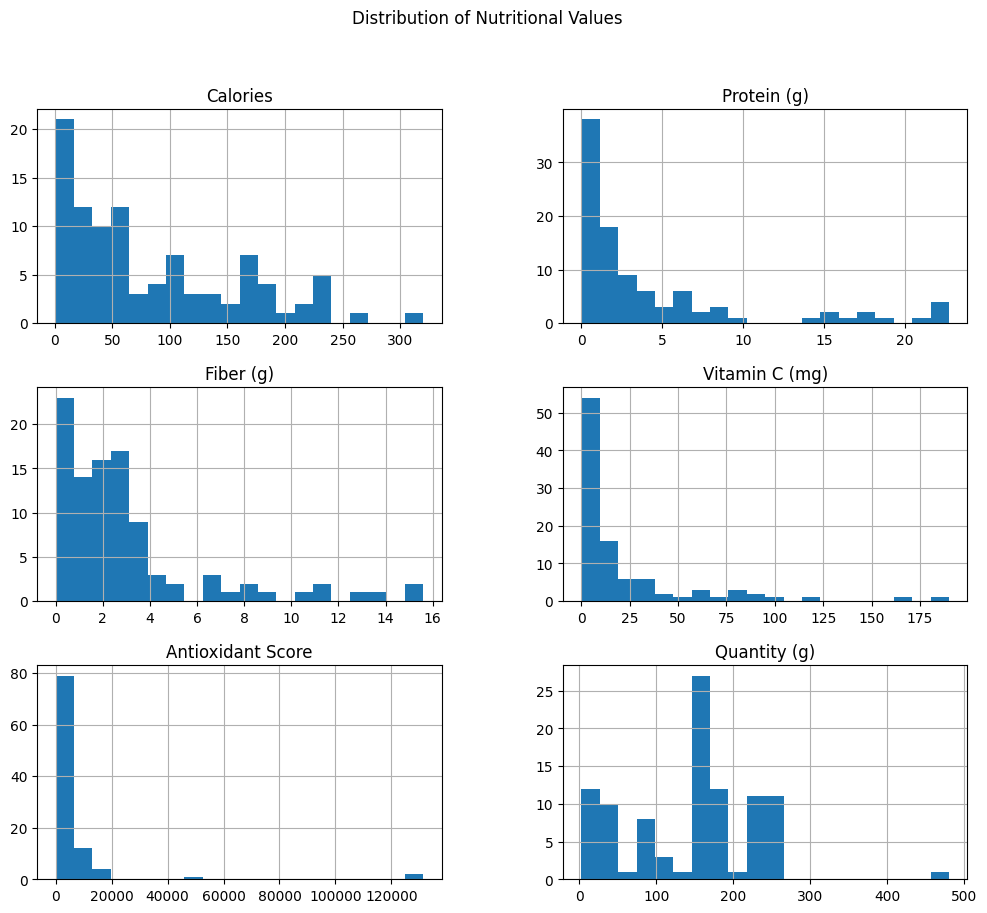

In [13]:
df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribution of Nutritional Values')
plt.show()

<Figure size 800x600 with 0 Axes>

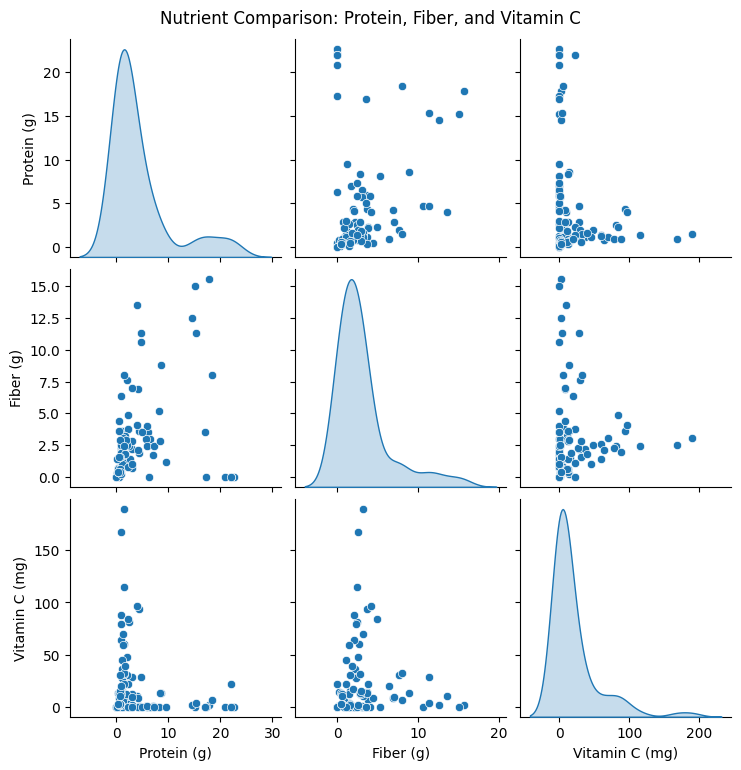

In [16]:
if 'Protein (g)' in df.columns and 'Fiber (g)' in df.columns and 'Vitamin C (mg)' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.pairplot(df[['Protein (g)', 'Fiber (g)', 'Vitamin C (mg)']], diag_kind='kde')
    plt.suptitle('Nutrient Comparison: Protein, Fiber, and Vitamin C', y=1.02)
    plt.show()

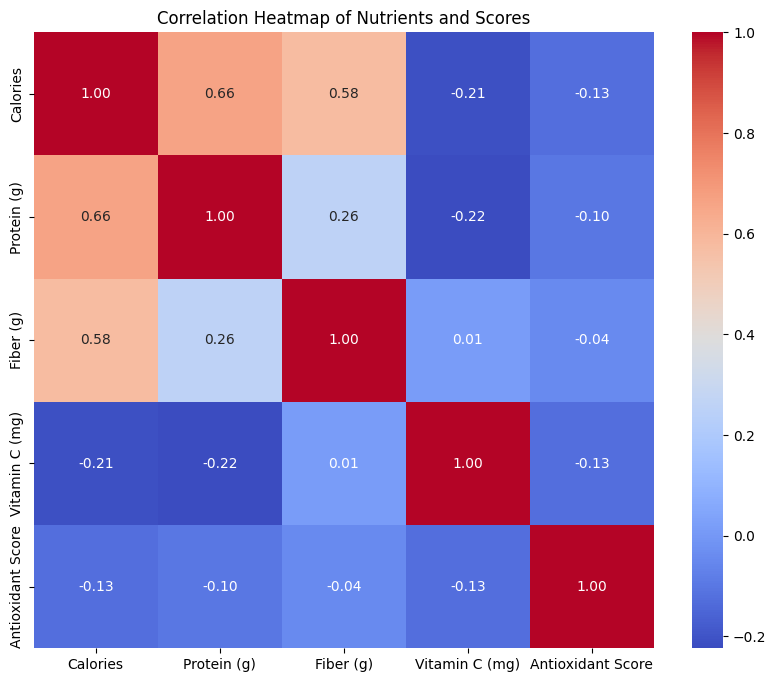

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Calories', 'Protein (g)', 'Fiber (g)', 'Vitamin C (mg)', 'Antioxidant Score']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Nutrients and Scores')
plt.show()

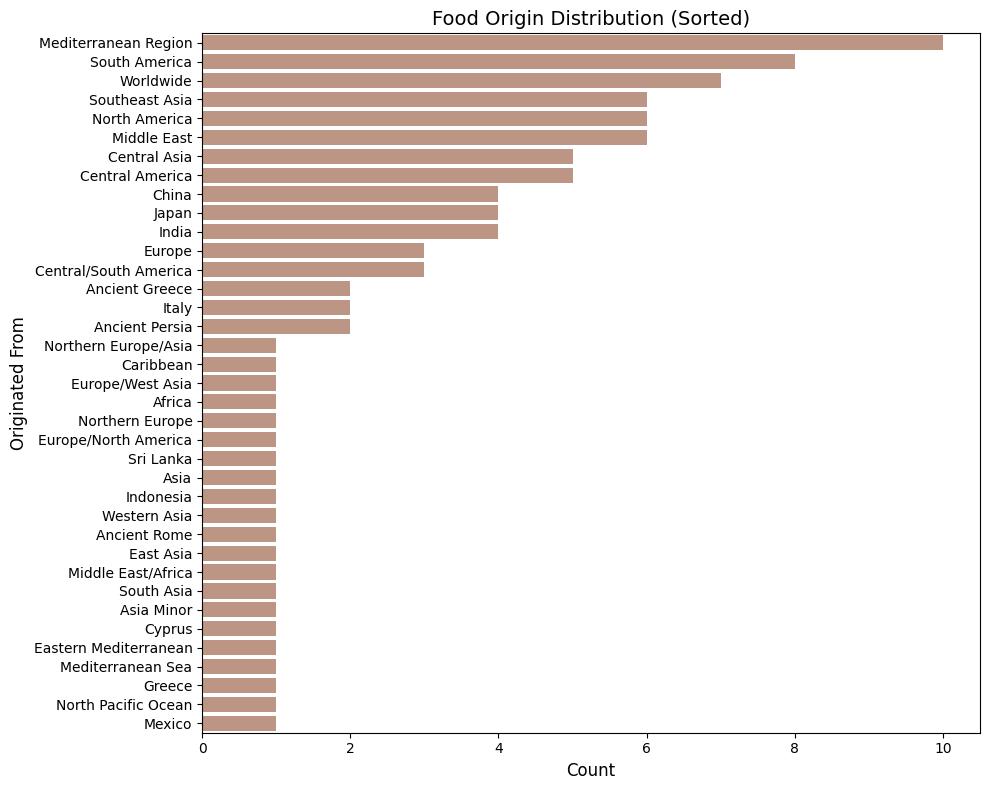

In [24]:
if 'Originated From' in df.columns:
    # Calculate counts and sort in descending order
    sorted_counts = df['Originated From'].value_counts(ascending=False)

    plt.figure(figsize=(10, 8))  # Adjust figure size
    sns.barplot(
        x=sorted_counts.values,  # Use sorted values for x
        y=sorted_counts.index,   # Use sorted labels for y
        color='#c6917b'          # Apply color
    )
    plt.title('Food Origin Distribution (Sorted)', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Originated From', fontsize=12)
    plt.tight_layout()  # Ensures everything fits nicely
    plt.show()


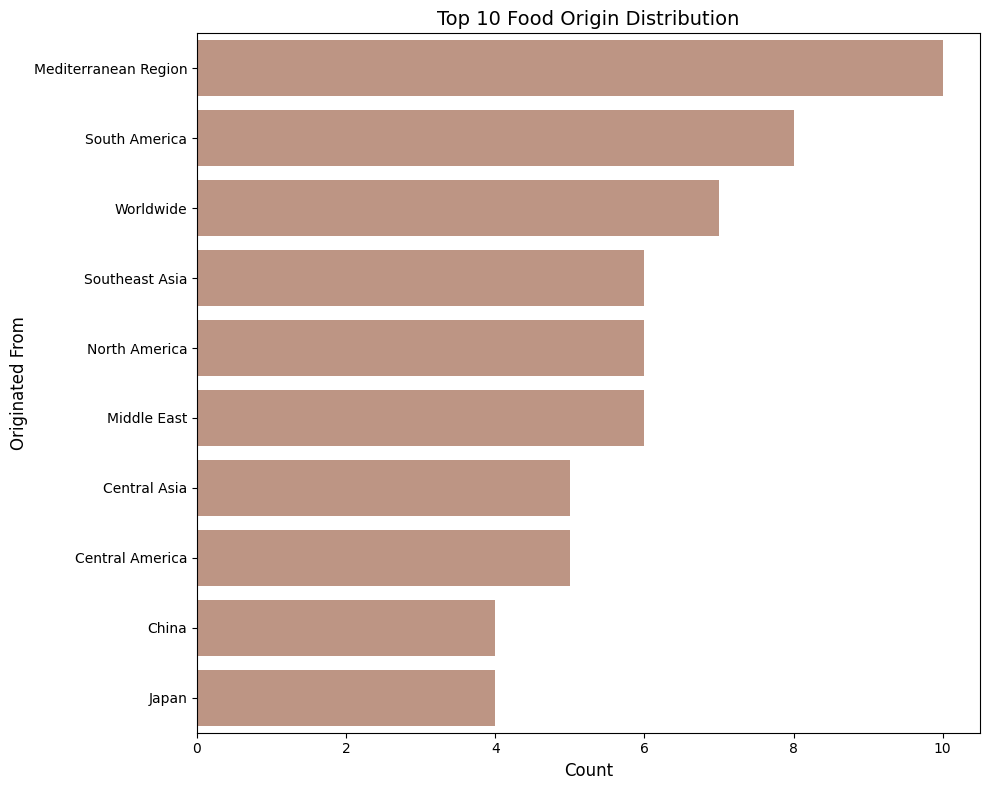

In [25]:
if 'Originated From' in df.columns:
    top_10_counts = df['Originated From'].value_counts(ascending=False).head(10)

    plt.figure(figsize=(10, 8))  
    sns.barplot(
        x=top_10_counts.values, 
        y=top_10_counts.index, 
        color='#c6917b'        
    )
    plt.title('Top 10 Food Origin Distribution', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('Originated From', fontsize=12)
    plt.tight_layout()
    plt.show()


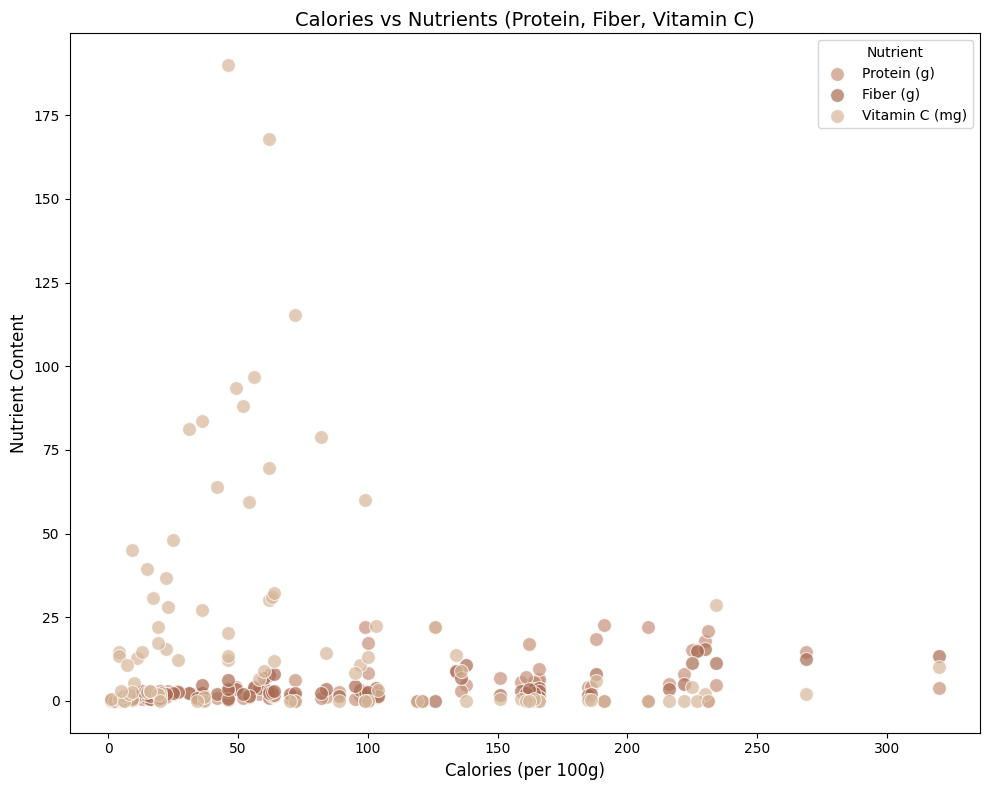

In [31]:
plt.figure(figsize=(10, 8))

# Plot Calories vs Protein
sns.scatterplot(x='Calories', y='Protein (g)', data=df, label='Protein (g)', color='#c6917b', s=100, alpha=0.7)

# Plot Calories vs Fiber
sns.scatterplot(x='Calories', y='Fiber (g)', data=df, label='Fiber (g)', color='#a96b52', s=100, alpha=0.7)

# Plot Calories vs Vitamin C
sns.scatterplot(x='Calories', y='Vitamin C (mg)', data=df, label='Vitamin C (mg)', color='#d6b79a', s=100, alpha=0.7)

plt.title('Calories vs Nutrients (Protein, Fiber, Vitamin C)', fontsize=14)
plt.xlabel('Calories (per 100g)', fontsize=12)
plt.ylabel('Nutrient Content', fontsize=12)
plt.legend(title='Nutrient')
plt.tight_layout()
plt.show()


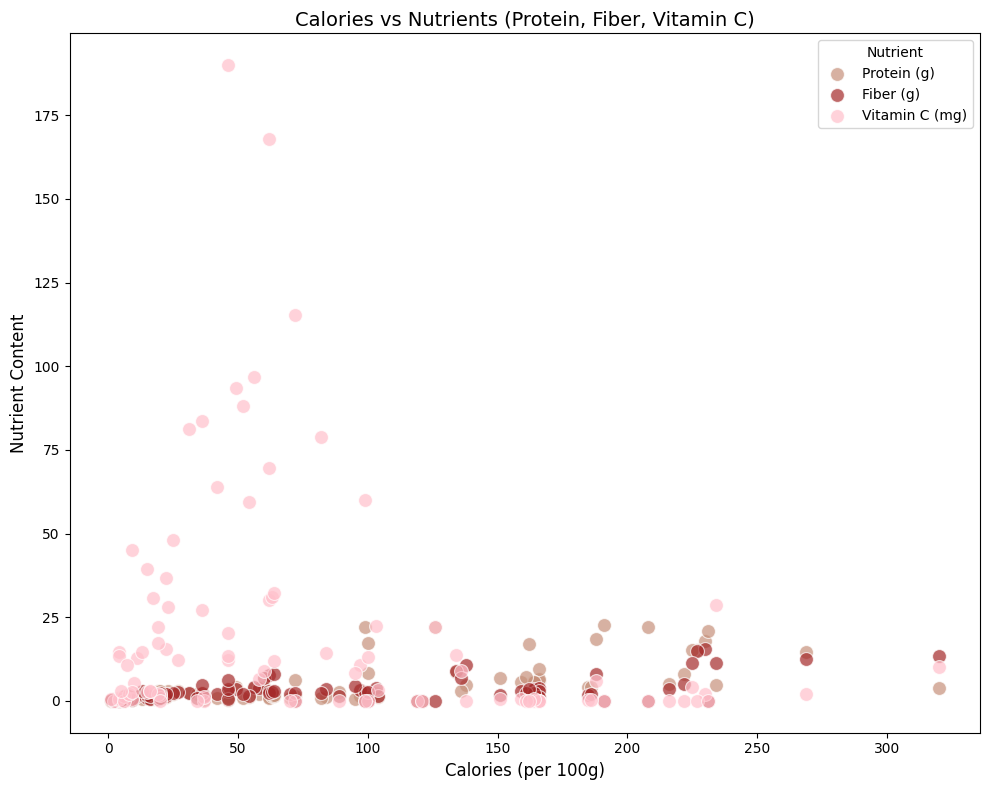

In [34]:
plt.figure(figsize=(10, 8))

# Plot Calories vs Protein
sns.scatterplot(x='Calories', y='Protein (g)', data=df, label='Protein (g)', color='#c6917b', s=100, alpha=0.7)

# Plot Calories vs Fiber
sns.scatterplot(x='Calories', y='Fiber (g)', data=df, label='Fiber (g)', color='brown', s=100, alpha=0.7)

# Plot Calories vs Vitamin C
sns.scatterplot(x='Calories', y='Vitamin C (mg)', data=df, label='Vitamin C (mg)', color='pink', s=100, alpha=0.7)

plt.title('Calories vs Nutrients (Protein, Fiber, Vitamin C)', fontsize=14)
plt.xlabel('Calories (per 100g)', fontsize=12)
plt.ylabel('Nutrient Content', fontsize=12)
plt.legend(title='Nutrient')
plt.tight_layout()
plt.show()

In [21]:
food_item = 'Kale'
if food_item in df['Food'].values:
    food_data = df[df['Food'] == food_item]
    print(f"\nNutritional Info for {food_item}:")
    print(food_data)
else:
    print(f"{food_item} not found in the dataset.")


Nutritional Info for Kale:
   Food Nutrition Value (per 100g)        Quantity Originated From  Calories  \
0  Kale   High in Vitamins A, C, K  1 cup, chopped  Ancient Greece        49   

   Protein (g)  Fiber (g)  Vitamin C (mg)  Antioxidant Score  Quantity (g)  
0          4.3        3.6            93.4               1770           150  


In [15]:
print(df.columns)

Index(['Food', 'Nutrition Value (per 100g)', 'Quantity', 'Originated From',
       'Calories', 'Protein (g)', 'Fiber (g)', 'Vitamin C (mg)',
       'Antioxidant Score', 'Quantity (g)'],
      dtype='object')


In [7]:
df.to_csv("clean-food.csv", index = False)